In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
wine = pd.read_csv('winequalityN.csv')

In [ ]:
wine.head()

type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
0  white            7.0              0.27  ...       0.45      8.8        6
1  white            6.3              0.30  ...       0.49      9.5        6
2  white            8.1              0.28  ...       0.44     10.1        6
3  white            7.2              0.23  ...       0.40      9.9        6
4  white            7.2              0.23  ...       0.40      9.9        6

[5 rows x 13 columns]

In [ ]:
pred_test = wine.iloc[3]

In [ ]:
pred_test['type'] = 1
pred_test.drop(['quality','total sulfur dioxide'],inplace=True)
#pred_test.drop('total_sulfur_dioxide',inplace=True)
pred_test

type                        1
fixed acidity             7.2
volatile acidity         0.23
citric acid              0.32
residual sugar            8.5
chlorides               0.058
free sulfur dioxide        47
density                0.9956
pH                       3.19
sulphates                 0.4
alcohol                   9.9
Name: 3, dtype: object

In [ ]:
wine.shape

(6497, 13)

In [ ]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
wine.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    6487.000000       6489.000000  ...  6497.000000  6497.000000
mean        7.216579          0.339691  ...    10.491801     5.818378
std         1.296750          0.164649  ...     1.192712     0.873255
min         3.800000          0.080000  ...     8.000000     3.000000
25%         6.400000          0.230000  ...     9.500000     5.000000
50%         7.000000          0.290000  ...    10.300000     6.000000
75%         7.700000          0.400000  ...    11.300000     6.000000
max        15.900000          1.580000  ...    14.900000     9.000000

[8 rows x 12 columns]

In [ ]:
# One to remove na values is just by dropping them since they are very few
wine.dropna()
#another way is to impute let's say average value
#wine.update(wine.fillna(wine.mean()))

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
wine['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

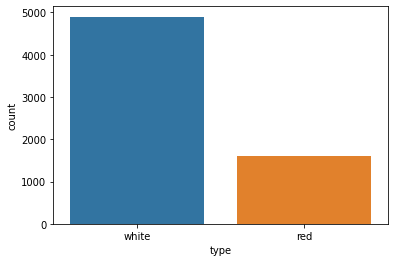

In [ ]:
sns.countplot(x="type", data=wine)

In [ ]:
wine['type'].value_counts(normalize=True)

white    0.753886
red      0.246114
Name: type, dtype: float64

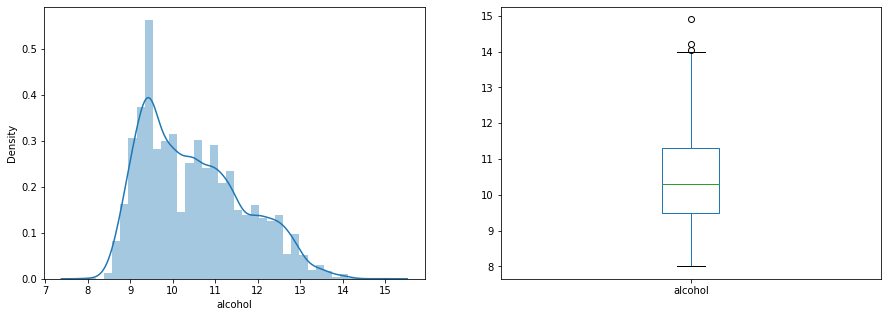

In [ ]:
#Checking distribution and outlier for each variable
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['alcohol'])
plt.subplot(122)
wine['alcohol'].plot.box(figsize=(15,5))
#repeat this for all the variables and understand the distribution

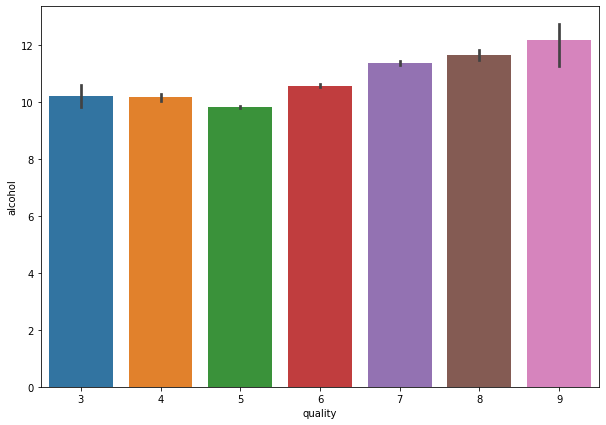

In [ ]:
#bivariate analysis to check quality with all the other variables
plt.figure(figsize=(10,7))
sns.barplot(x='quality',y='alcohol',data=wine)

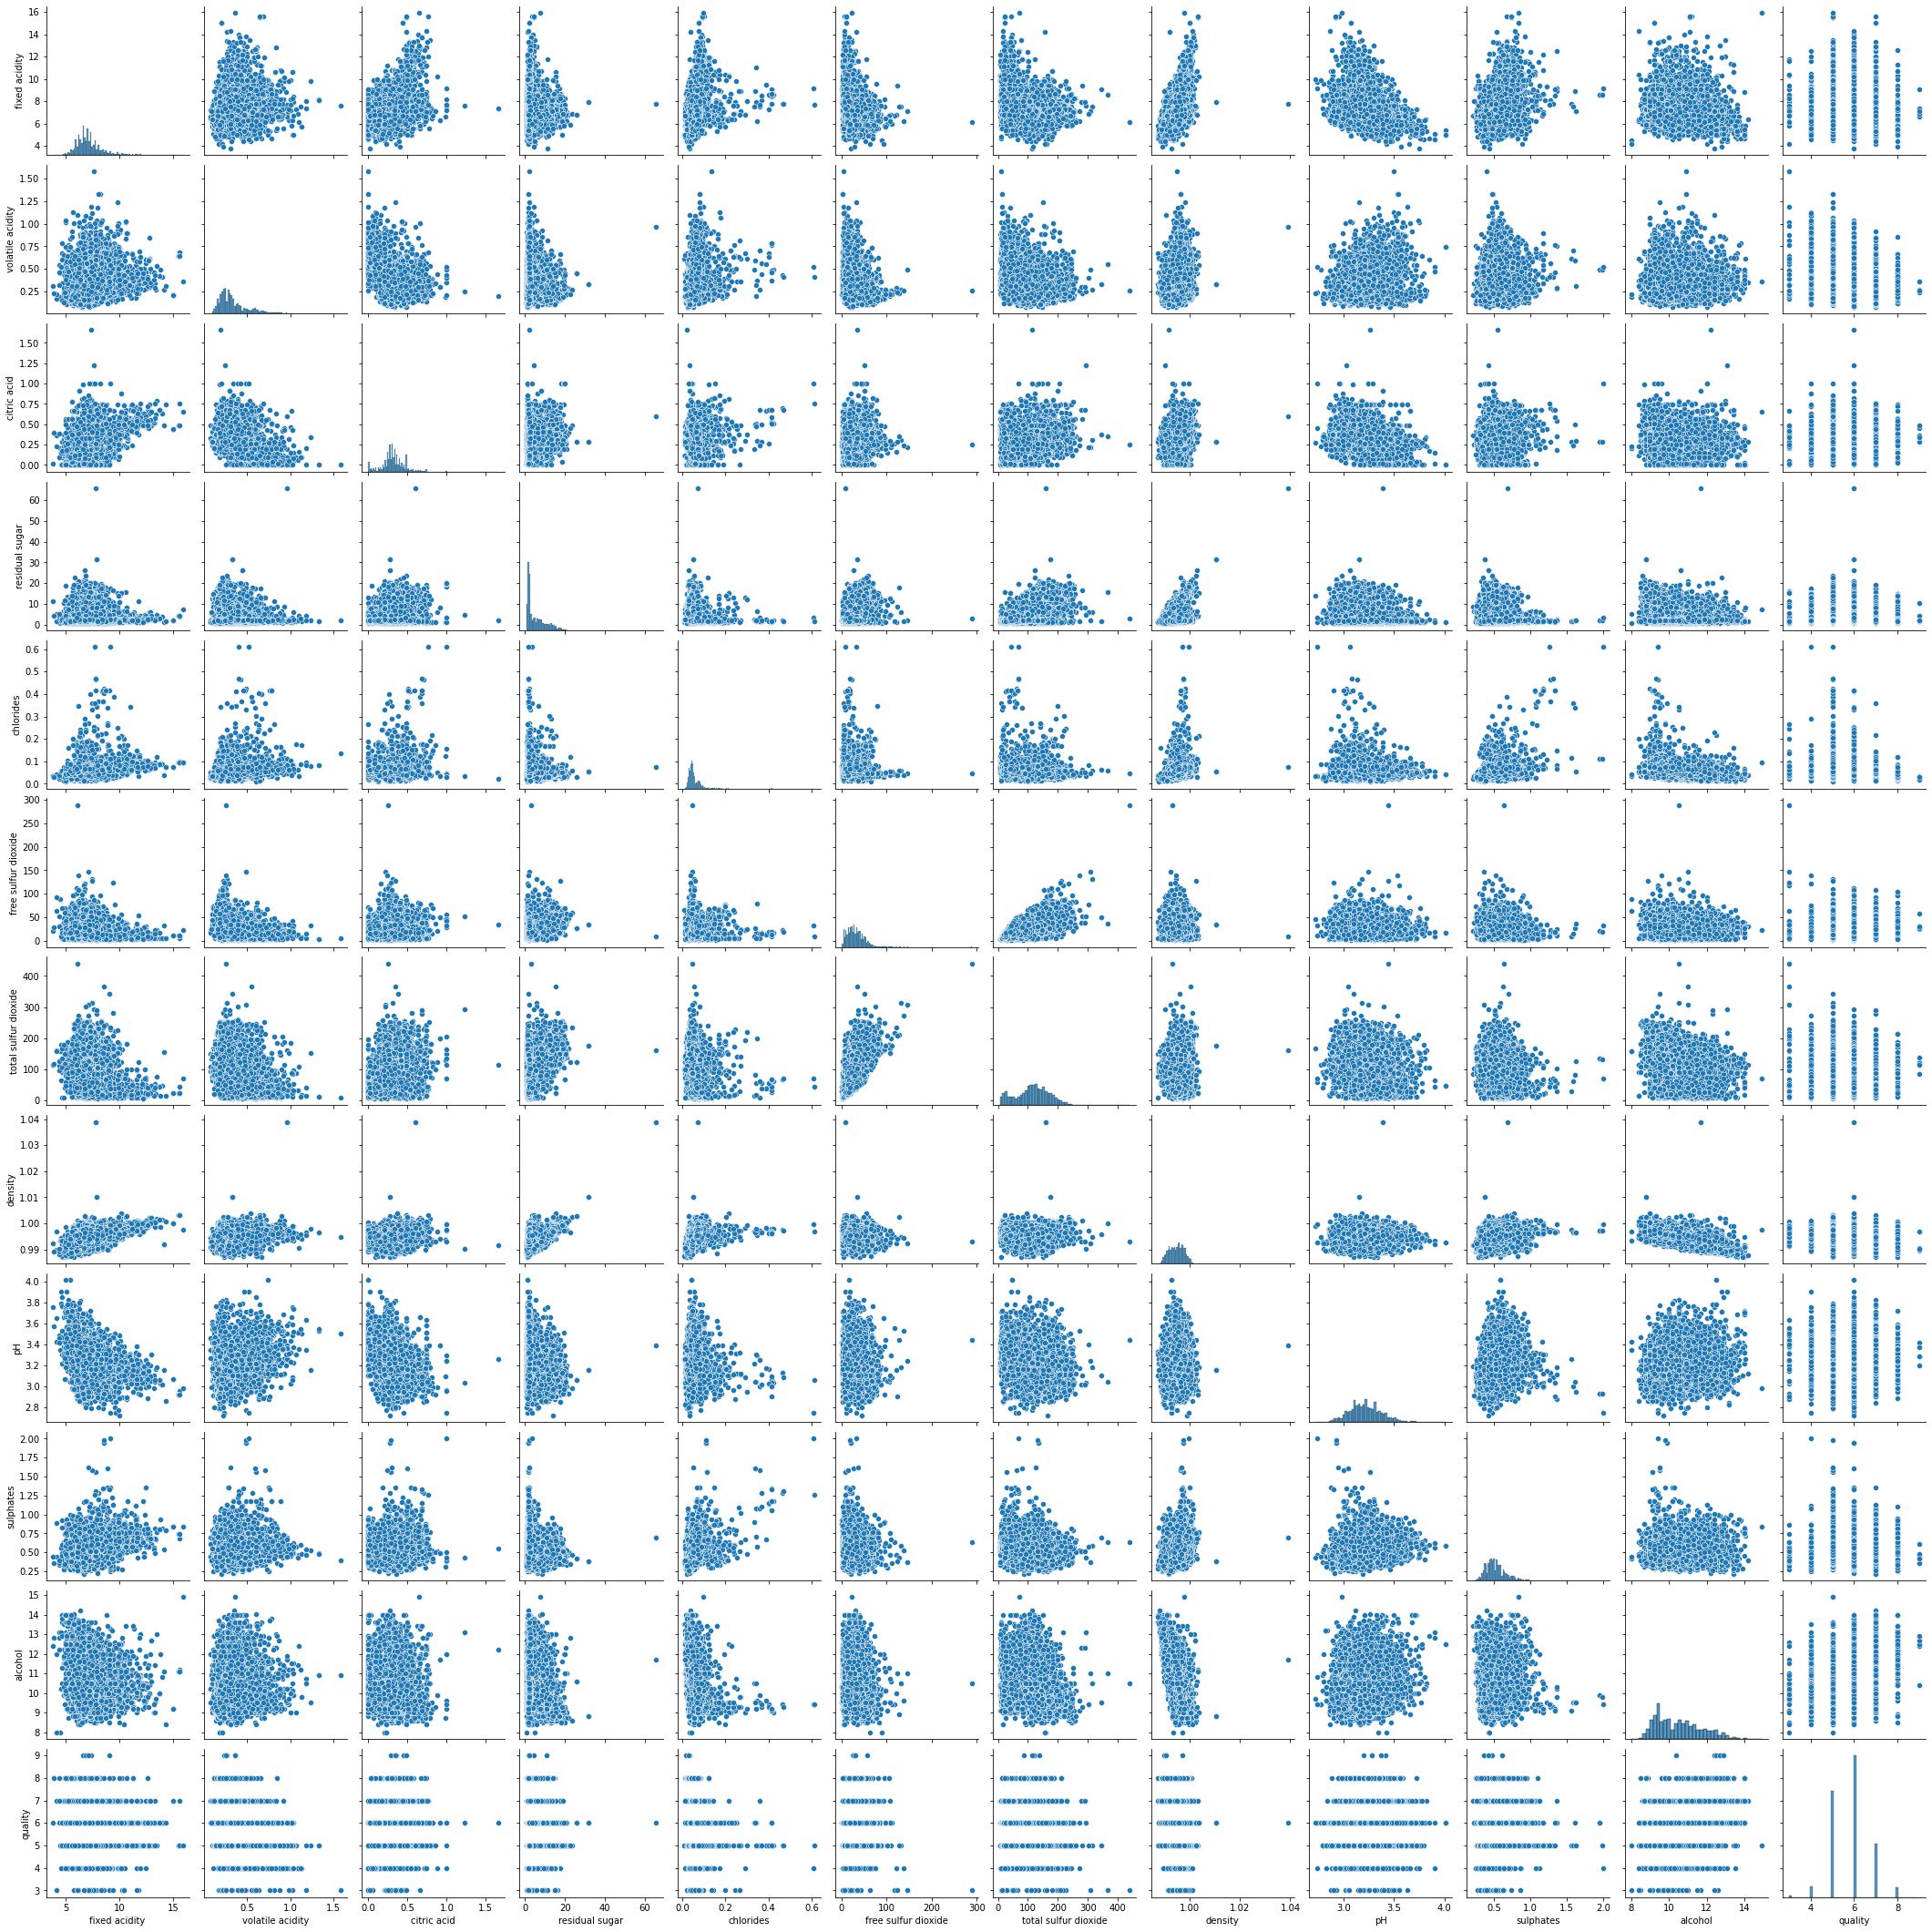

In [ ]:
#Plotting all variables for their distribution and relation
sns.pairplot(wine)

In [ ]:
#checking correlation
wine.corr()

fixed acidity  volatile acidity  ...   alcohol   quality
fixed acidity              1.000000          0.220172  ... -0.095603 -0.077031
volatile acidity           0.220172          1.000000  ... -0.038248 -0.265953
citric acid                0.323736         -0.378061  ... -0.010433  0.085706
residual sugar            -0.112319         -0.196702  ... -0.359706 -0.036825
chlorides                  0.298421          0.377167  ... -0.256861 -0.200886
free sulfur dioxide       -0.283317         -0.353230  ... -0.179838  0.055463
total sulfur dioxide      -0.329747         -0.414928  ... -0.265740 -0.041385
density                    0.459204          0.271193  ... -0.686745 -0.305858
pH                        -0.251814          0.260660  ...  0.121002  0.019366
sulphates                  0.300380          0.225476  ... -0.003261  0.038729
alcohol                   -0.095603         -0.038248  ...  1.000000  0.444319
quality                   -0.077031         -0.265953  ...  0.444319  1.000000

[12 rows x 12 columns]

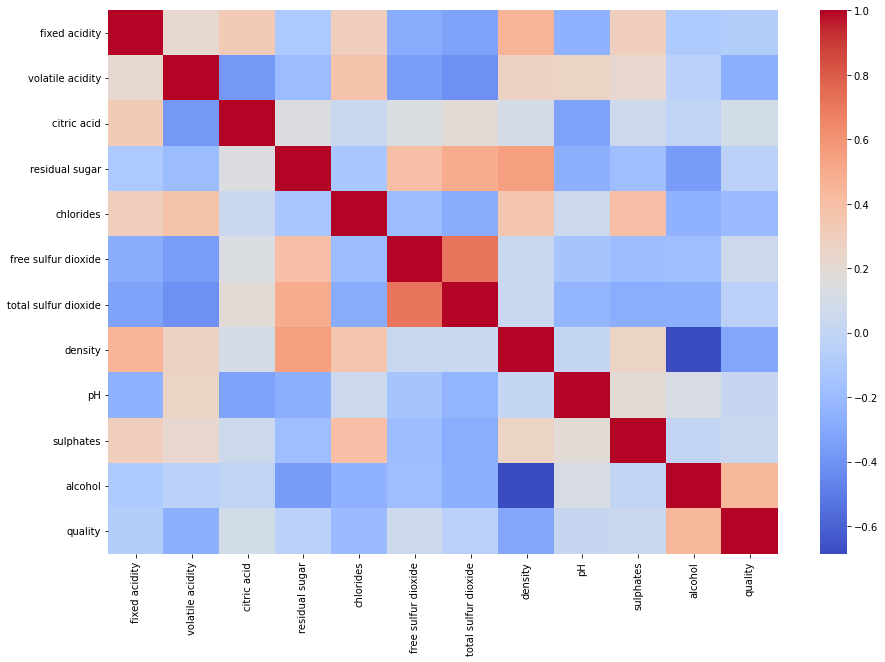

In [ ]:
#buidling heatmap
plt.figure(figsize=(15,10))
sns.heatmap(wine.corr(), cmap='coolwarm')

In [ ]:
#Dropping highly correlated variables - in this case total sulfur dioxide
wine_new = wine.drop('total sulfur dioxide',axis=1)

In [ ]:
#Convert categorical value to dummies
wine_ml = pd.get_dummies(wine_new, drop_first=True)
wine_ml.head()

fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type_white
0            7.0              0.27         0.36  ...      8.8        6           1
1            6.3              0.30         0.34  ...      9.5        6           1
2            8.1              0.28         0.40  ...     10.1        6           1
3            7.2              0.23         0.32  ...      9.9        6           1
4            7.2              0.23         0.32  ...      9.9        6           1

[5 rows x 12 columns]

In [ ]:
wine_ml.dtypes

fixed acidity          float64
volatile acidity       float64
citric acid            float64
residual sugar         float64
chlorides              float64
free sulfur dioxide    float64
density                float64
pH                     float64
sulphates              float64
alcohol                float64
quality                  int64
type_white               uint8
dtype: object

In [ ]:
wine_ml.dropna(inplace=True)
X = wine_ml.drop('quality',axis=1)

In [ ]:
X.isnull().sum()

fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
type_white             0
dtype: int64

In [ ]:
Y = wine_ml['quality'].apply(lambda y: 1 if y > 7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
6491    0
6492    0
6494    0
6495    0
6496    0
Name: quality, Length: 6463, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
x_standard = scaler.transform(X)

In [ ]:
scaler = StandardScaler()
pred_test = np.asarray(pred_test).reshape(1,-1)
scaler.fit(pred_test)
pred_test_std = scaler.transform(pred_test)

In [ ]:
X = x_standard

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.2,random_state=123)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
pred_test_output = logreg.predict(pred_test_std)
pred_test_output

array([0])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(Y_test, y_pred)

0.9682907965970611

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1252
           1       0.00      0.00      0.00        41

    accuracy                           0.97      1293
   macro avg       0.48      0.50      0.49      1293
weighted avg       0.94      0.97      0.95      1293



In [ ]:
confusion_matrix(Y_test, y_pred)

array([[1252,    0],
       [  41,    0]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)

In [ ]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
accuracy_score(Y_test, rfc_pred)

0.974477958236659

In [ ]:
confusion_matrix(Y_test, rfc_pred)

array([[1252,    0],
       [  33,    8]])

In [ ]:
classification_report(Y_test, rfc_pred)

'              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.99      1252\n           1       1.00      0.20      0.33        41\n\n    accuracy                           0.97      1293\n   macro avg       0.99      0.60      0.66      1293\nweighted avg       0.98      0.97      0.97      1293\n'

In [ ]:
print(classification_report(Y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1252
           1       1.00      0.20      0.33        41

    accuracy                           0.97      1293
   macro avg       0.99      0.60      0.66      1293
weighted avg       0.98      0.97      0.97      1293



In [ ]:
rfc.feature_importances_

array([0.08861312, 0.10244594, 0.07724979, 0.11605696, 0.09230858,
       0.10486621, 0.11324662, 0.09198322, 0.10203816, 0.10912377,
       0.00206761])

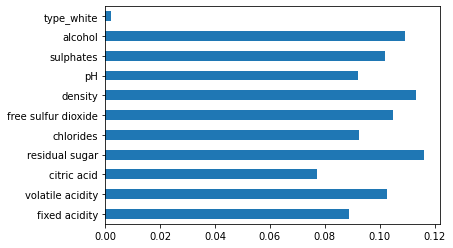

In [ ]:
pd.Series(rfc.feature_importances_,index=wine_ml.drop('quality',axis=1).columns).plot(kind='barh')